# Predicción de tarifas de taxis

In [1]:
# Importando librerías

import pandas as pd
import numpy as np
import warnings
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ignoramos los futuros warnings
warnings.filterwarnings("ignore")

In [13]:
# Cargando datos

'''
    Aquí cada uno escribira su propia ruta para no subir el archivo dado que es demasiado pasado
'''

# Ruta de Danilo
#nombre_archivo ='../../PracticaCalificada2-CC421/train.csv'

# Ruta de Victor
nombre_archivo ='D:/Nueva carpeta (4)/UNI-21-I/IA/PracticaCalificada2-CC421/PracticaCalificada2-CC421/train.csv'

# Cargando los datos
# Estoy usando una menor cantidad de data ya que mi hardware no soporta los 55 millones de datos y demora mucho varias veces 
# Si se desea trabajar con toda la data completa borrar nrows = 1000000
df = pd.read_csv(nombre_archivo,nrows=1000000)

## 1. Análisis de Datos

In [14]:
# Visualización de los 30 primeros datos
df.head(30)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [15]:
# Cantidad de instancias y atributos (filas x columndas)

print("Cantidad de Instancias: "+str(df.shape[0]))
print("Cantidad de Atributos: "+str(df.shape[1]))

Cantidad de Instancias: 1000000
Cantidad de Atributos: 8


In [16]:
# Visualización de los tipos de datos del dataframe
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [17]:
# Descripción actual de algunas mediciones 
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [18]:
# Verificando la correlación de las caracteristicas

'''
    Nota: Necesitan ser trabajadas dando que hay mucha dependencia entre características y poca correlación
        con la característica a predecir.
'''

df.corr(method='pearson')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.008740,-0.007676,0.009644,-0.007629,0.012801
pickup_longitude,0.008740,1.000000,-0.529033,0.786037,-0.638188,0.000023
pickup_latitude,-0.007676,-0.529033,1.000000,-0.725437,0.455654,-0.001138
dropoff_longitude,0.009644,0.786037,-0.725437,1.000000,-0.511984,0.000680
dropoff_latitude,-0.007629,-0.638188,0.455654,-0.511984,1.000000,-0.000194
passenger_count,0.012801,0.000023,-0.001138,0.000680,-0.000194,1.000000


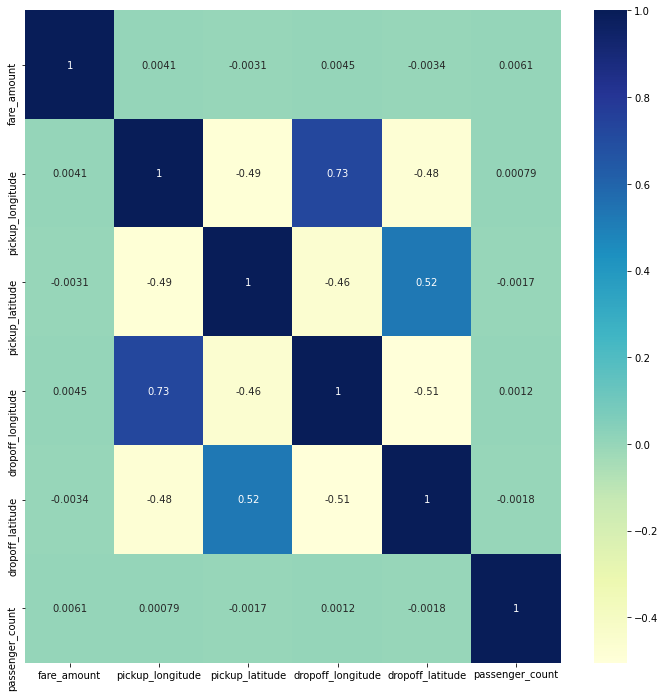

In [9]:
plt.figure(figsize=(12,12))

correlacion = df.corr(method='pearson')

sns.heatmap(correlacion, annot=True,  cmap="YlGnBu")
plt.show()

In [19]:
# Verificando la cantidad de datos corrompidos o nulos

df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [11]:
df.sort_values('pickup_datetime')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
44194380,2009-01-01 00:00:27.0000001,30.2,2009-01-01 00:00:27 UTC,-73.782104,40.644881,-73.963565,40.676348,1
880228,2009-01-01 00:00:46.0000002,15.0,2009-01-01 00:00:46 UTC,-73.953738,40.806762,-73.989427,40.769542,1
13340185,2009-01-01 00:00:49.0000002,4.2,2009-01-01 00:00:49 UTC,-73.993185,40.727841,-73.990781,40.730007,1
661006,2009-01-01 00:01:04.0000001,5.8,2009-01-01 00:01:04 UTC,-73.995133,40.734111,-73.998232,40.722874,2
12913471,2009-01-01 00:01:04.0000003,14.6,2009-01-01 00:01:04 UTC,-73.972484,40.742743,-73.918937,40.764496,1
...,...,...,...,...,...,...,...,...
41030757,2015-06-30 23:59:46.0000001,24.5,2015-06-30 23:59:46 UTC,-73.987198,40.739059,-73.962769,40.672539,2
49938742,2015-06-30 23:59:48.0000003,33.5,2015-06-30 23:59:48 UTC,-73.970360,40.783756,-73.870560,40.709118,1
14242297,2015-06-30 23:59:48.0000002,6.0,2015-06-30 23:59:48 UTC,-73.978867,40.750820,-73.989326,40.740780,2
22749696,2015-06-30 23:59:52.0000001,9.5,2015-06-30 23:59:52 UTC,-73.944077,40.711658,-73.982857,40.719799,1


## 2. Procesamiento de Datos

In [20]:
# Eliminamos 'key' ya que esta característica no aporta información relevante
df.drop(columns=['key'], inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
999995,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


In [21]:
# Eliminaremos los datos nulos y duplicados dado que la cantidad de estos es insignificante para la población

df_new = df.drop_duplicates()
df_new.dropna(inplace=True)
df_new

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
999995,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


In [22]:
'''
    Tareas:
    -Analizar las características individualmente, con el fin de saber si hay outliers, además se podría ver
    esto con gráficas de boxplot.
    -Actualmente las características no son buenas, la latitud y longitud podrían darnos nuevas características
    que sirvan mejor para las predicciones.
    -La característica datatime actualmente es de clase objeto podemos darle un mejor uso si dividimos en año y
    horas o como crean convenientes.
'''

'\n    Tareas:\n    -Analizar las características individualmente, con el fin de saber si hay outliers, además se podría ver\n    esto con gráficas de boxplot.\n    -Actualmente las características no son buenas, la latitud y longitud podrían darnos nuevas características\n    que sirvan mejor para las predicciones.\n    -La característica datatime actualmente es de clase objeto podemos darle un mejor uso si dividimos en año y\n    horas o como crean convenientes.\n'

## 3. Tratamiento de Datos

In [27]:
import datetime
##separamos los dias meses años y horas 
## Se cita https://stackoverflow.com/questions/53914889/extract-day-of-month-as-array-from-datetime-column

df_new['pickup_datetime'] = pd.to_datetime(df_new['pickup_datetime'], errors='coerce')
df_new['day']=df_new['pickup_datetime'].dt.day.values
df_new['month']=df_new['pickup_datetime'].dt.month.values
df_new['year']=df_new['pickup_datetime'].dt.year.values
df_new['hours']=df_new['pickup_datetime'].dt.hour.values

df_new


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7
...,...,...,...,...,...,...,...,...,...,...,...
999995,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,13,9,2014,21
999996,7.3,2010-09-20 14:50:37+00:00,-73.992103,40.671385,-73.992103,40.671385,2,20,9,2010,14
999997,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,26,4,2013,14
999998,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,8,7,2011,0


## 4. Modelamiento

## 5. Optimización y forecasting